In [1]:
import numpy as np
import pandas as pd

In [2]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df = total_score_df[total_score_df['inning'] == 2]
total_score_df



,match_id,inning,total_runs
1,1,2,172
3,2,2,187
5,3,2,184
7,4,2,164
9,5,2,142
...,...,...,...
1519,11347,2,137
1521,11412,2,140
1523,11413,2,170
1525,11414,2,162


In [4]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,172
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,187
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,137
750,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,140
751,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,170
752,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,162


In [5]:
match_df['team1'].unique()


array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [6]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]


In [7]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]


In [8]:
match_df.shape


(640, 20)

In [9]:
match_df = match_df[match_df['dl_applied'] == 0]
match_df = match_df[['match_id','city','winner','total_runs']]
delivery_df = match_df.merge(delivery,on='match_id')
delivery_df = delivery_df[delivery_df['inning'] == 2]
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149445,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149446,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149447,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149448,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [10]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])
delivery_df.columns


Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder', 'current_score',
       'runs_left', 'balls_left'],
      dtype='object')

In [11]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,171,119,10
126,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,171,118,10
127,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,171,117,10
128,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,169,116,10
129,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,165,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149445,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,5,4,5
149446,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,3,3,5
149447,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,2,2,4
149448,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,0,1,4


In [12]:
# crr = runs/overs & rrr = reamaining runs/ reamaining overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [13]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [14]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]
final_df = final_df.sample(final_df.shape[0])
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
89703,Chennai Super Kings,Mumbai Indians,NaN,4,10,7,142,7.527273,2.4,1


In [15]:
final_df.dropna(inplace=True)
final_df = final_df[final_df['balls_left'] != 0]
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
120803,Royal Challengers Bangalore,Delhi Daredevils,Raipur,67,71,8,139,8.816327,5.661972,1
45140,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,64,79,8,132,9.951220,4.860759,1
42058,Deccan Chargers,Rajasthan Royals,Nagpur,34,23,5,157,7.608247,8.869565,0
13636,Chennai Super Kings,Delhi Daredevils,Delhi,34,19,6,188,9.148515,10.736842,1
63044,Royal Challengers Bangalore,Kings XI Punjab,Chandigarh,10,13,7,166,8.747664,4.615385,1
...,...,...,...,...,...,...,...,...,...,...
53736,Deccan Chargers,Kolkata Knight Riders,Hyderabad,112,91,10,149,7.655172,7.384615,0
61816,Royal Challengers Bangalore,Rajasthan Royals,Bangalore,79,81,8,136,8.769231,5.851852,0
105607,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,39,27,5,154,7.419355,8.666667,0
25741,Kings XI Punjab,Kolkata Knight Riders,Port Elizabeth,75,61,7,154,8.033898,7.377049,1


In [47]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [48]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
109051,Royal Challengers Bangalore,Chennai Super Kings,Chennai,66,69,7,124,6.823529,5.739130
84271,Delhi Daredevils,Chennai Super Kings,Chennai,25,24,4,135,6.875000,6.250000
35250,Kolkata Knight Riders,Chennai Super Kings,Kolkata,31,48,4,109,6.500000,3.875000
114347,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,84,55,6,182,9.046154,9.163636
32077,Kings XI Punjab,Chennai Super Kings,Durban,37,35,6,92,3.882353,6.342857
...,...,...,...,...,...,...,...,...,...
104579,Rajasthan Royals,Chennai Super Kings,Ahmedabad,72,62,10,157,8.793103,6.967742
103866,Chennai Super Kings,Mumbai Indians,Mumbai,73,70,8,189,13.920000,6.257143
45617,Deccan Chargers,Kings XI Punjab,Dharamsala,105,67,8,178,8.264151,9.402985
113920,Chennai Super Kings,Mumbai Indians,Kolkata,53,32,6,161,7.363636,9.937500


In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [51]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [52]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [53]:
y_pred = pipe.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7297827610371409

In [55]:
pipe.predict_proba(X_test)[10]

array([0.42695014, 0.57304986])

In [56]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [57]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win','runs_left','crr','rrr']]
    return temp_df,target
    

In [58]:
temp_df,target = match_progression(delivery_df,12,pipe)

temp_df

Target- 145


,end_of_over,runs_after_over,wickets_in_over,lose,win,runs_left,crr,rrr
1564,1,3,0,26.4,73.6,142,3.000000,7.473684
1571,2,4,1,40.2,59.8,138,3.500000,7.666667
1577,3,1,3,87.4,12.6,137,2.666667,8.058824
1583,4,2,0,85.1,14.9,135,2.500000,8.437500
1589,5,8,0,82.0,18.0,127,3.600000,8.466667
1595,6,3,0,78.9,21.1,124,3.500000,8.857143
1601,7,10,0,74.9,25.1,114,4.428571,8.769231
1607,8,2,1,85.1,14.9,112,4.125000,9.333333
1613,9,3,0,82.6,17.4,109,4.000000,9.909091
1620,10,12,0,79.0,21.0,97,4.800000,9.700000


Text(0.5, 1.0, 'Target-145')

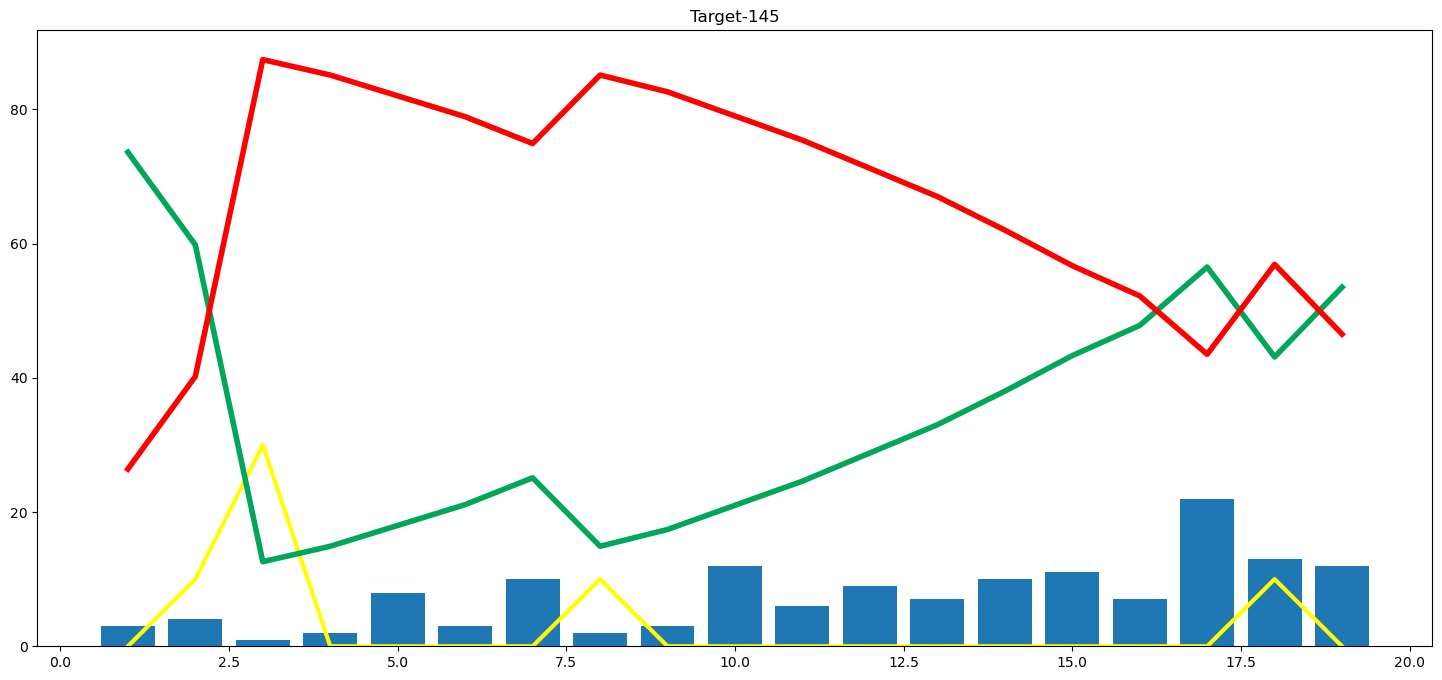

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],10*temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [60]:
teams


['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [61]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [62]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))